# Exploration phase (**optional**)

In this exploration phase we will visualize some features of your dataset to help you make more informed decisitions in case you want to **adapt the default parameters** to your dataset.

You can always skip this part and go with the default parameters but if you want to have a classifier as efficient as possible you should consider spending five minutes running this analysis.

## 1.1 Distribution of classes
**Relevant parameters:** `use_class_weights`

We can visualize the distributions of the classes to check is the dataset is highly imbalanced.

In [47]:

import os

import matplotlib.pylab as plt
import numpy as np
from tqdm import tqdm

from planktonclas import paths, config
from planktonclas.data_utils import load_image, load_data_splits, augment, load_class_names ,create_data_splits
import numpy as np
from collections import Counter
import yaml
conf_path = "/srv/phyto-plankton-classification/etc/demo-config.yaml"
with open(conf_path, 'r') as f:
    CONF = yaml.safe_load(f)

CONF = config.get_conf_dict(CONF)


#if not using demo
splits_dir = paths.get_splits_dir()

#if using DEMO
splits_dir="/srv/phyto-plankton-classification/data/demo-dataset_files"



if 'train.txt' not in os.listdir(splits_dir ):
    if not (CONF['dataset']['split_ratios']):
        if (CONF['training']['use_validation']) & (CONF['testing']['use_test']):
            split_ratios=[0.7,0.15,0.15]
        elif (CONF['training']['use_validation']) & (~CONF['testing']['use_test']):
            split_ratios=[0.9,0.1,0]
        else:
            split_ratios=[1,0,0]
    else:
        split_ratios=(CONF['dataset']['split_ratios'])
    create_data_splits(splits_dir=splits_dir,
                                    im_dir=CONF['general']['images_directory'],
                                    split_ratios=split_ratios)
        



# Load the training data
X_train, y_train = load_data_splits(splits_dir=splits_dir,
                                    im_dir=CONF['general']['images_directory'],
                                    split_name='train')

# Load the validation data
if (CONF['training']['use_validation']) and ('val.txt' in os.listdir(splits_dir)):
    X_val, y_val = load_data_splits(splits_dir=splits_dir,
                                    im_dir=CONF['general']['images_directory'],
                                    split_name='val')
else:
    print('No validation data.')
    X_val, y_val = None, None
    CONF['training']['use_validation'] = False

    
if (CONF['testing']['use_test']) and ('test.txt' in os.listdir(splits_dir)):
    X_test, y_test = load_data_splits(splits_dir=splits_dir,
                                    im_dir=CONF['general']['images_directory'],
                                    split_name='test')
else:
    print('No validation data.')
    X_test, y_test = None, None
    CONF['training']['use_test'] = False
    
# Load the class names
class_names = load_class_names(splits_dir=splits_dir)

Processing /srv/phyto-plankton-classification/data/demo-images: 0it [00:00, ?it/s]
Processing /srv/phyto-plankton-classification/data/demo-images/Actinoptychus: 100%|██████████| 14/14 [00:00<00:00, 24324.88it/s]
Processing /srv/phyto-plankton-classification/data/demo-images/Bacillariophyceae: 100%|██████████| 16/16 [00:00<00:00, 24519.13it/s]
Processing /srv/phyto-plankton-classification/data/demo-images/Ciliophora: 100%|██████████| 19/19 [00:00<00:00, 8065.97it/s]
Processing /srv/phyto-plankton-classification/data/demo-images/Dinoflagellata: 100%|██████████| 20/20 [00:00<00:00, 34044.68it/s]
Processing /srv/phyto-plankton-classification/data/demo-images/Noctilucales: 100%|██████████| 23/23 [00:00<00:00, 17001.94it/s]
Processing /srv/phyto-plankton-classification/data/demo-images/Tripos: 100%|██████████| 13/13 [00:00<00:00, 15605.60it/s]
Searching files: 7it [00:00, 64.98it/s]
Writing /srv/phyto-plankton-classification/data/demo-dataset_files/train.txt: 100%|██████████| 87/87 [00:00<00

Loading train data...
Loading val data...
Loading test data...
Loading class names...


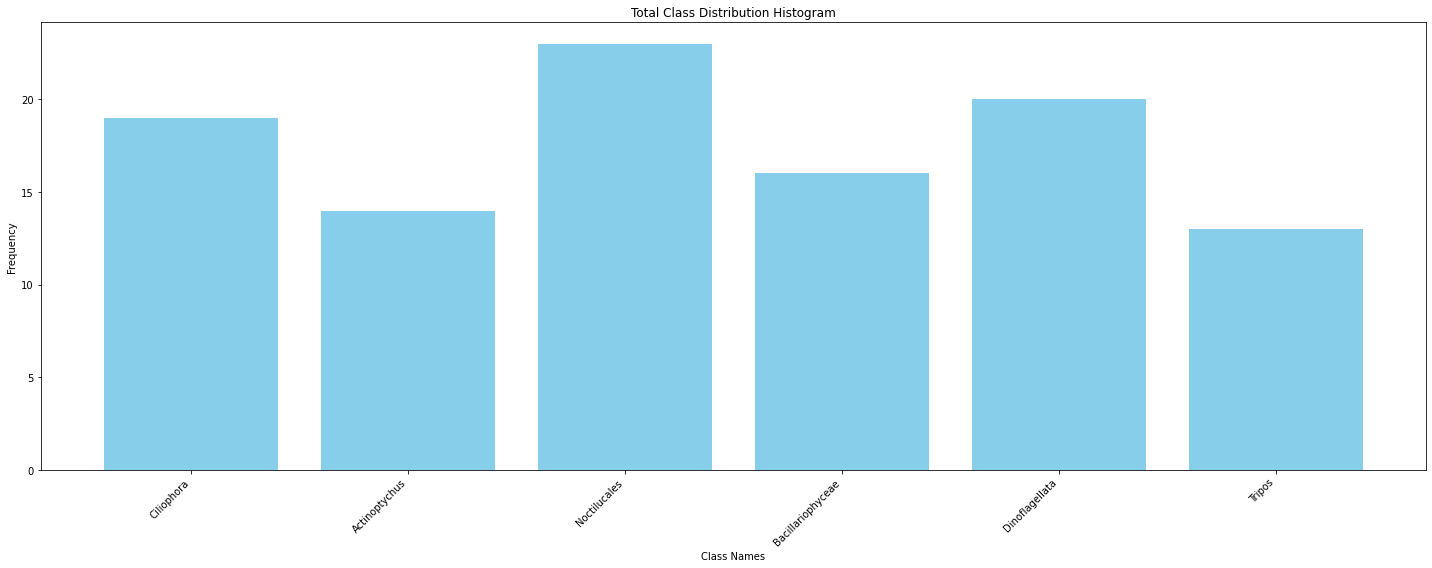

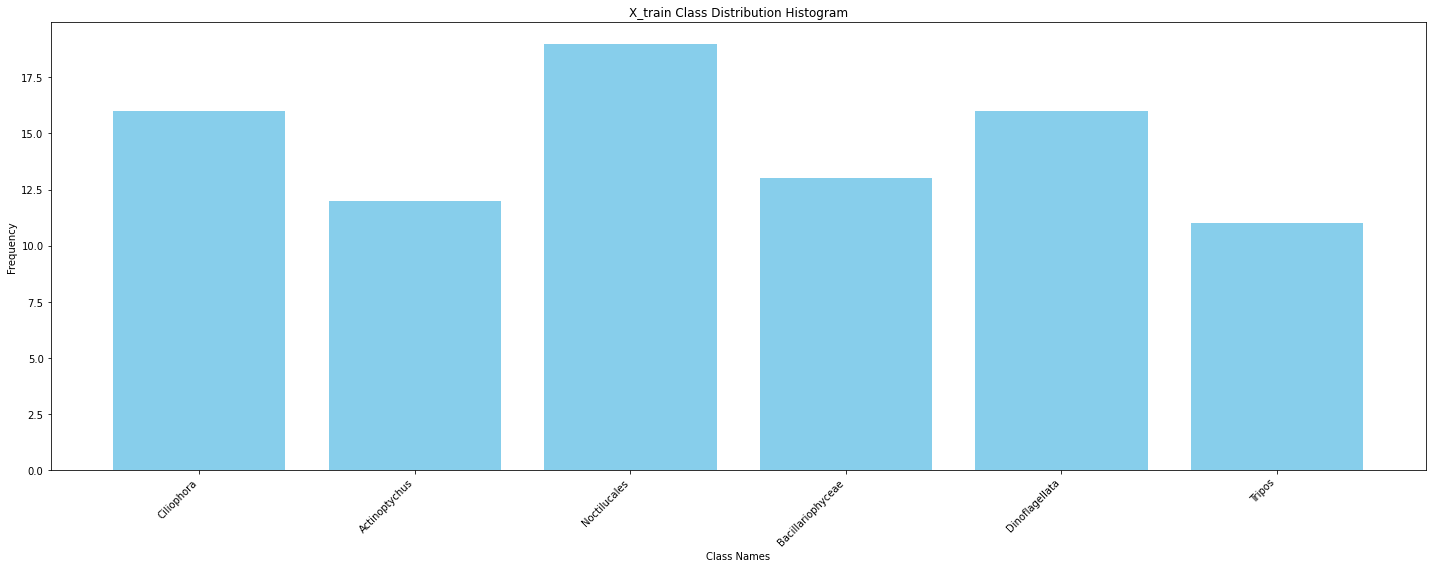

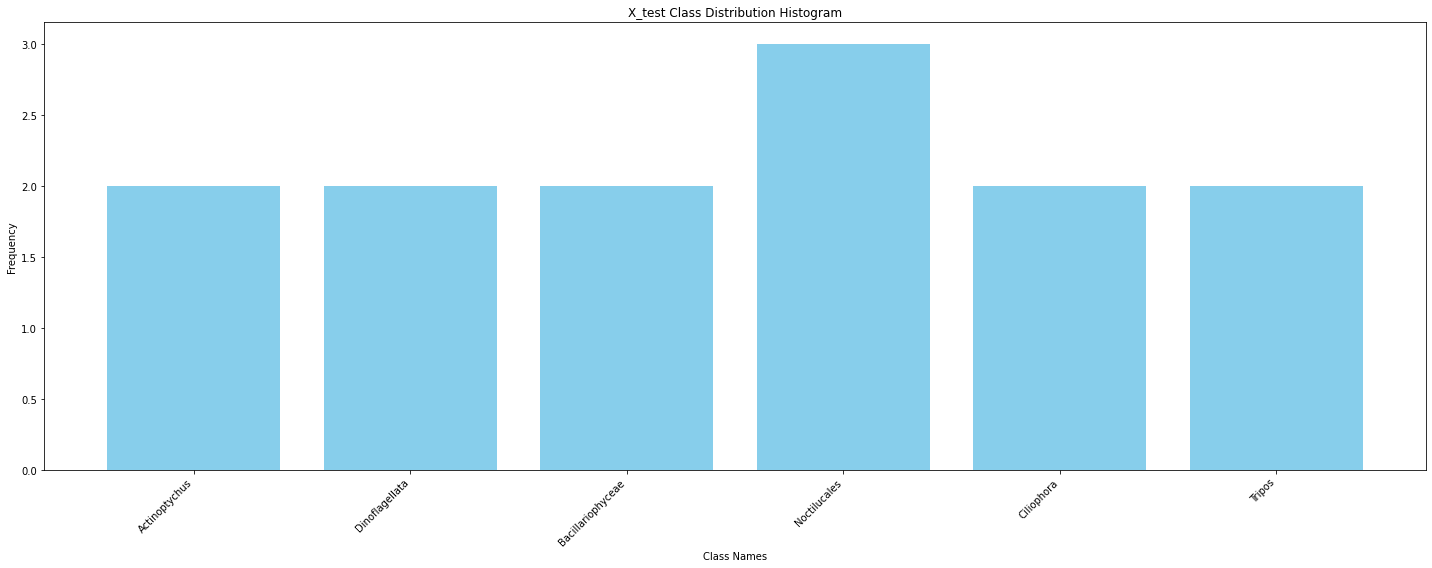

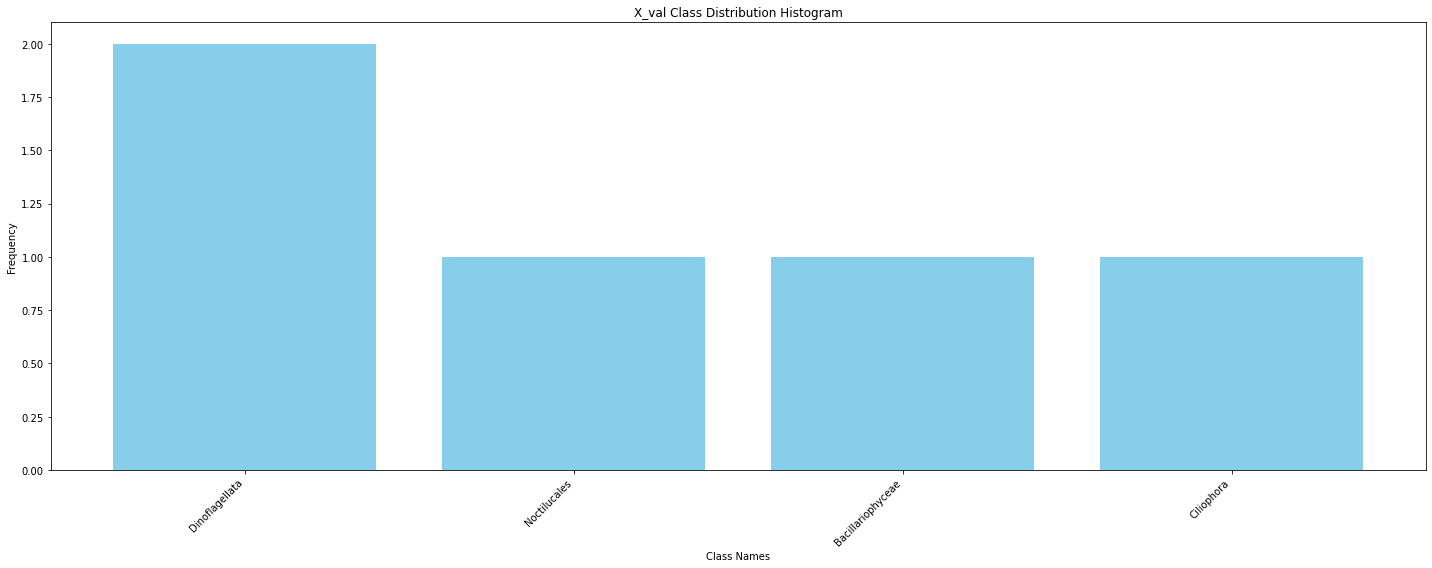

In [46]:




# Concatenate the datasets
all_data = np.concatenate((X_train, X_test, X_val))

# Extract class names from file paths for all datasets
class_names_all = [path.split('/')[-2] for path in all_data]

# Count occurrences of each class for all datasets
class_counts_all = Counter(class_names_all)

# Extract class names and counts for all datasets
classes_all = list(class_counts_all.keys())
counts_all = list(class_counts_all.values())

# Plot histogram for all datasets combined
plt.figure(figsize=(20, 8))
plt.bar(classes_all, counts_all, color='skyblue')
plt.xlabel('Class Names')
plt.ylabel('Frequency')
plt.title('Total Class Distribution Histogram')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot histogram for each dataset separately
datasets = {'X_train': X_train, 'X_test': X_test, 'X_val': X_val}
for dataset_name, dataset in datasets.items():
    class_names = [path.split('/')[-2] for path in dataset]
    class_counts = Counter(class_names)
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(20, 8))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class Names')
    plt.ylabel('Frequency')
    plt.title(f'{dataset_name} Class Distribution Histogram')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

Max Training: 19.0
Min Training: 11.0
Mean Training: 14.5
Median Training: 14.5


Max Validation: 2.0
Min Validation: 0.0
Mean Validation: 0.8333333333333334
Median Validation: 1.0




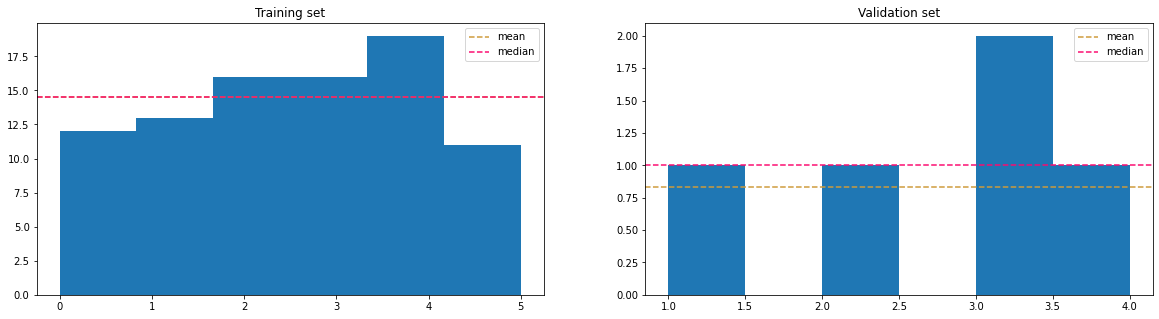

In [53]:
# Define some parameters
log_scale = False
show_names = False

# Plot the histograms
fig, axs = plt.subplots(1, 2, figsize=(20,5))

def plot_hist(ax, y, set_name=''):
    n, bins, patches = ax.hist(y, bins=len(class_names), log=log_scale)
    mean, med = np.mean(n), np.median(n)
    ax.axhline(mean, linestyle= '--', color='#ce9b3b', label='mean')
    ax.axhline(med, linestyle= '--', color='#fc0c70', label='median')
    ax.set_title('{} set'.format(set_name))
    ax.legend()
    if show_names:
        ax.set_xticks(range(len(class_names)))
        ax.set_xticklabels(class_names, rotation='vertical')

    print('Max {}: {}'.format(set_name, np.amax(n)))
    print('Min {}: {}'.format(set_name, np.amin(n)))
    print('Mean {}: {}'.format(set_name, mean))
    print('Median {}: {}'.format(set_name, med))
    print('\n')

plot_hist(axs[0], y_train, set_name='Training')

axs[1].set_title('Validation set')
if y_val is not None:
    plot_hist(axs[1], y_val, set_name='Validation')

So if your dataset is **very** imbalanced you can consider setting the `use_class_weights` to `True` to compensate for this imbalance during the training.

## 1.2 Distribution of image sizes
**Relevant parameters:** `im_size`

We can visualize how the sizes of your images are tipically distributed in case you want to use a bigger image size resolution than the default.

In [54]:
# Load all images and retrieve their shapes
height, width = [], []
for img_path in tqdm(X_train):
    img = load_image(img_path)
    w, h, channels = img.shape
    width.append(w)
    height.append(h)

100%|██████████| 87/87 [00:00<00:00, 114.36it/s]


Max Heights: 436
Min Heights: 30
Mean Heights: 87.6
Median Heights: 68.0
Heights 5th percentile: 39.3


Max Widths: 555
Min Widths: 37
Mean Widths: 106.6
Median Widths: 79.0
Widths 5th percentile: 44.9


Max Combined: 555
Min Combined: 30
Mean Combined: 97.1
Median Combined: 74.0
Combined 5th percentile: 41.65




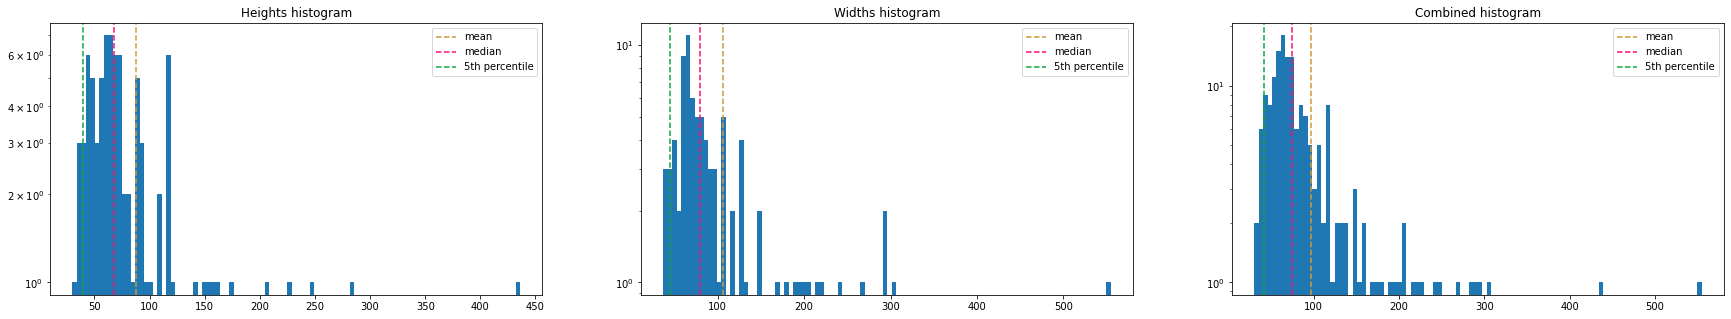

In [55]:
# Define some parameters
bins = 100
log_scale = True
lower_percentile = 5

def plot_hist(ax, values, set_name=''):
    
    # Print some stats
    mean, med, per = np.mean(values), np.median(values), np.percentile(values, lower_percentile)

    print('Max {}: {}'.format(set_name, np.amax(values)))
    print('Min {}: {}'.format(set_name, np.amin(values)))
    print('Mean {}: {:.1f}'.format(set_name, mean))
    print('Median {}: {}'.format(set_name, med))
    print('{} {}th percentile: {}'.format(set_name, lower_percentile, per))
    print('\n')
      
    # Plot the histogram
    ax.hist(values, bins=bins, log=log_scale)
    ax.set_title('{} histogram'.format(set_name))
    ax.axvline(mean, linestyle= '--', color='#ce9b3b', label='mean')
    ax.axvline(med, linestyle= '--', color='#fc0c70', label='median')
    ax.axvline(per, linestyle= '--', color='#0ea541', label='{}th percentile'.format(lower_percentile))
    ax.legend()

    
fig, axs = plt.subplots(1, 3, figsize=(30,5))
axs = axs.flatten()

plot_hist(axs[0], height, set_name='Heights')
plot_hist(axs[1], width, set_name='Widths')
plot_hist(axs[2], height + width, set_name='Combined')

So after examining these plots and stats you can consider adapting the parameter `im_size` to better suit your usecase (maybe to a value in between the `Min combined` and the `Combined 5th percentile`).

When **increasing** this parameter from the default value you have to consider that:
* you keep more details in the image so the accuracy of the model *might* (or might not) increase.
* bigger images size means longer training and inference times
* bigger images means more model parameters. So it is possible to that model becomes too big to be trained on a GPU. 